In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df=pd.read_csv(r"../data/train.csv")
train_df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [3]:
test_df=pd.read_csv(r"../data/test.csv")
test_df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [4]:
train_df.shape,test_df.shape

((440833, 12), (64374, 12))

In [5]:
train_df.shape[0]+test_df.shape[0]

505207

In [6]:
df=pd.concat([train_df,test_df],axis=0)
df.shape

(505207, 12)

In [7]:
df.shape

(505207, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [42]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [9]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [10]:
df[df['CustomerID'].isnull()]

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1=df.dropna()
df1=df1.drop('CustomerID',axis=1)

In [12]:
df1.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
churn_count = df1[df1['Churn'] == 1].shape[0]
nonchurn_count = df1[df1['Churn'] == 0].shape[0]
churn_count,nonchurn_count

(280492, 224714)

<Axes: xlabel='Gender', ylabel='count'>

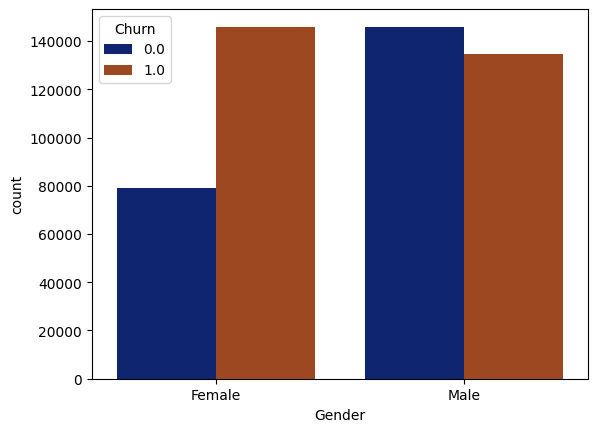

In [23]:
sns.countplot(x=df1['Gender'],hue=df1['Churn'],palette='dark')

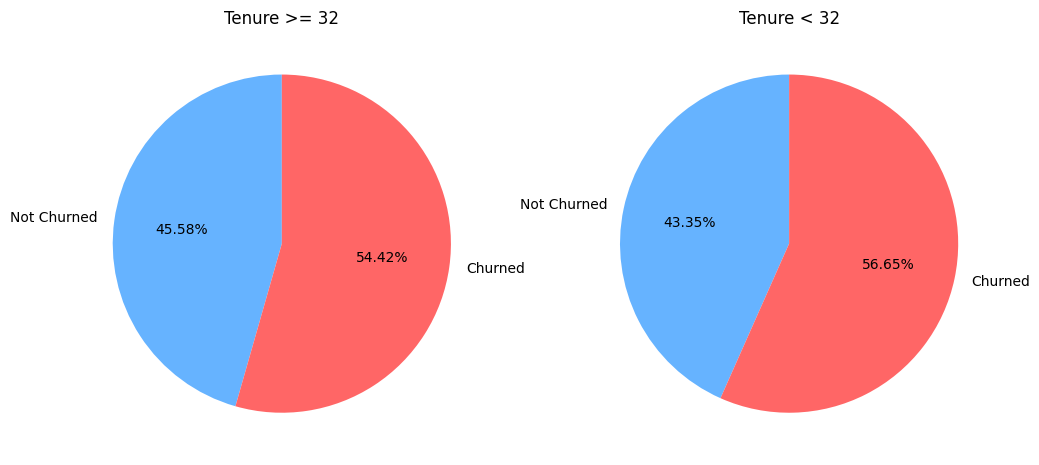

In [41]:
import matplotlib.pyplot as plt

counts_ge32 = df1[df1['Tenure'] >= 32].groupby('Churn')['Churn'].count()
counts_lt32 = df1[df1['Tenure'] < 32].groupby('Churn')['Churn'].count()

labels = ['Not Churned', 'Churned']
colors = ['#66b3ff', '#ff6666']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(counts_ge32, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
axes[0].set_title('Tenure >= 32')

axes[1].pie(counts_lt32, labels=labels, colors=colors, autopct='%.2f%%', startangle=90)
axes[1].set_title('Tenure < 32')

plt.show()


In [47]:
age_quartiles = pd.qcut(df1['Age'], 4)
print(age_quartiles.value_counts())


Age
(29.0, 40.0]      136823
(17.999, 29.0]    127573
(40.0, 49.0]      123011
(49.0, 65.0]      117799
Name: count, dtype: int64


In [46]:
import pandas as pd

# Create age quartiles
df1['Age_Quartile'] = pd.qcut(df1['Age'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Check the distribution
df1['Age_Quartile'].value_counts()
df1


,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age_Quartile
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,Q2
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,Q4
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,Q4
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,Q4
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0,Q3
64370,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0,Q2
64371,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0,Q1
64372,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0,Q4


In [51]:
import pandas as pd

df1['Age_Quartile'], bins = pd.qcut(df1['Age'], 4, retbins=True)
print("Quartile edges:", bins)


Quartile edges: [18. 29. 40. 49. 65.]


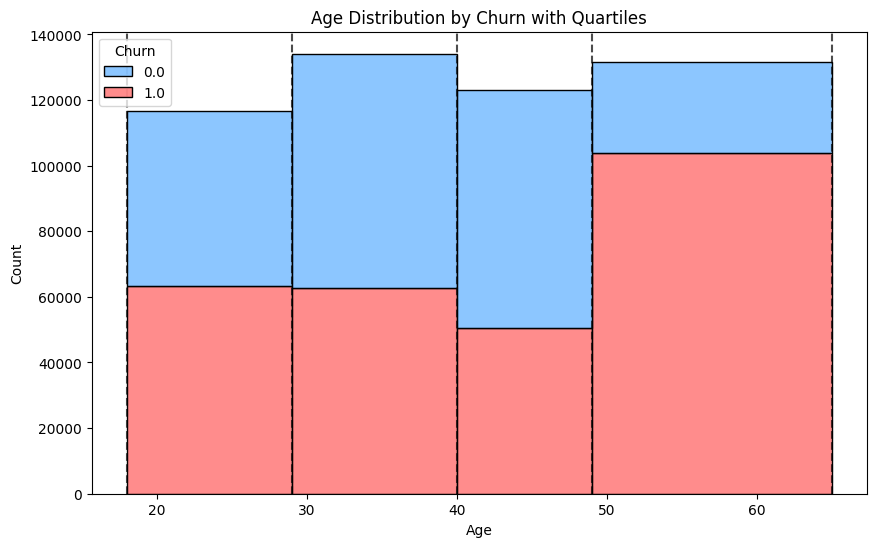

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.histplot(data=df1, x='Age', hue='Churn', bins=bins, palette=['#66b3ff','#ff6666'], multiple='stack')

for edge in bins:
    plt.axvline(edge, color='black', linestyle='--', alpha=0.7)

plt.title('Age Distribution by Churn with Quartiles')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [56]:
# Group by Age_Quartile and Churn, calculate counts
age_churn_counts = df1.groupby('Age_Quartile')['Churn'].value_counts().unstack(fill_value=0)

# Calculate percentage per quartile
age_churn_perc = age_churn_counts.div(age_churn_counts.sum(axis=1), axis=0) * 100


<Figure size 1000x600 with 0 Axes>

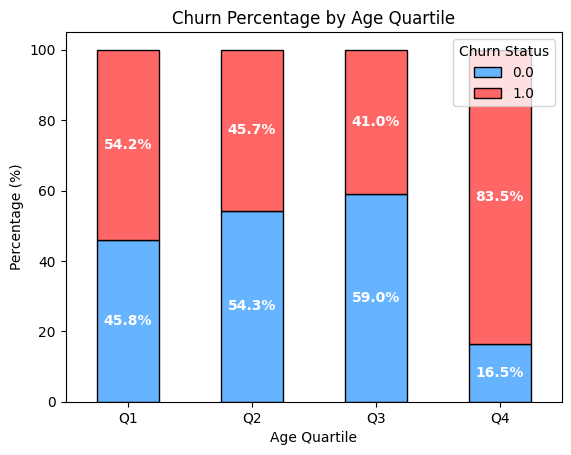

In [58]:
plt.figure(figsize=(10,6))
quartile_labels = ['Q1','Q2','Q3','Q4']
age_churn_perc.plot(kind='bar', stacked=True, color=['#66b3ff','#ff6666'], edgecolor='black')

plt.ylabel('Percentage (%)')
plt.xlabel('Age Quartile')
plt.title('Churn Percentage by Age Quartile')
plt.legend(title='Churn Status', loc='upper right')
plt.xticks(ticks=range(len(quartile_labels)), labels=quartile_labels, rotation=0)

# Annotate percentages on top of bars
for i, row in enumerate(age_churn_perc.itertuples(index=False)):
    bottom = 0
    for value in row:
        plt.text(i, bottom + value/2, f'{value:.1f}%', ha='center', va='center', color='white', fontweight='bold')
        bottom += value

plt.show()
